In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
height = 1080
width = 1920

In [3]:
image_size = (height,width,3)
space_for_ui = 0.15
piece_widths = np.array([0.3, 0.23, 0.43])*(1- space_for_ui)
angle = np.pi*0.25
piece2_d = 0.03 + piece_widths[2]/2 + piece_widths[2]/2 
piece1_x = 0.025 + piece_widths[0]/2
piece3_x = 1 - space_for_ui - 0.025-piece_widths[2]/2
piece2_x = piece3_x - np.cos(angle)*piece2_d

piece1_y = 0.45
piece3_y = 0.45
piece2_y = piece3_y + np.sin(angle)*piece2_d
piece_x_coords = [piece1_x, piece2_x, piece3_x]
piece_y_coords = [piece1_y, piece2_y, piece3_y]

yellow_color = (255, 204, 153)
dark_yellow_color = (255, 153, 51)

drums = np.zeros(shape=image_size, dtype=np.uint8)
for i in [0,1,2]:
    drums = cv2.circle(drums, (int(piece_x_coords[i]*width),int(piece_y_coords[i]*height)), int(width*piece_widths[i]/2), yellow_color, -1)
    drums = cv2.circle(drums, (int(piece_x_coords[i]*width),int(piece_y_coords[i]*height)), int(width*piece_widths[i]/5), (0,0,0), -1)
    drums = cv2.circle(drums, (int(piece_x_coords[i]*width),int(piece_y_coords[i]*height)), int(width*piece_widths[i]/2), dark_yellow_color, int(0.025*width))

drums = cv2.rectangle(drums, (int(0.86*width), int(0.3*height)), (int((1-0.025)*width), int(0.42*height)), yellow_color, -1)
font = cv2.FONT_HERSHEY_SIMPLEX
org = (int(0.868*width), int(0.38*height))
fontScale = 2
color = (1, 1, 1)
thickness = 5
drums = cv2.putText(drums, 'LEARN', org, font, fontScale, color, thickness, cv2.LINE_AA)

i = 0

In [4]:
drums_highlight = np.zeros(shape=image_size, dtype=np.uint8)
drums_highlight = cv2.circle(drums_highlight, (int(piece_x_coords[i]*width),int(piece_y_coords[i]*height)), int(width*piece_widths[i]/2), (255,255,255), -1)

In [6]:
res = cv2.addWeighted(drums, 0.5, drums_highlight, 0.5, 1.0)

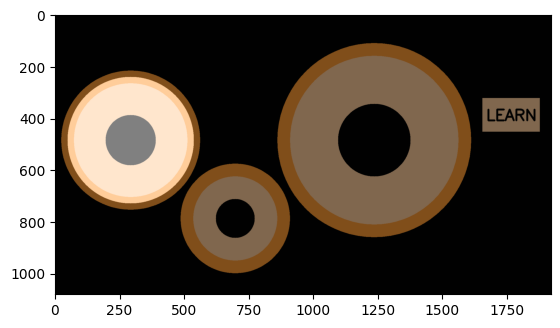

In [8]:
plt.imshow(res)